## Setting up

### Activate the auto-reload

In [120]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import the libraries

In [121]:
import sys
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

### Set file path to parent directory

In [122]:
sys.path.append(str(Path().resolve().parent / "src"))
os.chdir("../")

### Import the homemade functions

In [123]:
from src.data.data_import import DataImporter

### Get the API keys to access UN data

In [124]:
UN_API_KEY = "API key"

## Importing the data

In [125]:
importer = DataImporter(api_key="1b9e65d70d9f4e1c8323548618cf877f")
df = importer.get_merged_data()
df.head(20)

100%|██████████| 4/4 [00:36<00:00,  9.09s/it]
/Users/nakamurahanako/Documents/GitHub/graspp-25S-trade/src/data/data_import.py:92: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(list_df)


Saving the dataset to: /Users/nakamurahanako/Documents/GitHub/graspp-25S-trade/data/external/trade_raw.csv
Saving the dataset to: /Users/nakamurahanako/Documents/GitHub/graspp-25S-trade/data/interim/trade_clean.csv
Fetching ILO data from: https://rplumber.ilo.org/data/indicator/?id=EMP_TEMP_ECO_OCU_NB_A&timefrom=2000&timeto=2024&classif1=ECO_SECTOR_IND&classif2=OCU_SKILL_TOTAL&format=.csv
Saving the dataset to: /Users/nakamurahanako/Documents/GitHub/graspp-25S-trade/data/external/employment_raw.csv
Saving the dataset to: /Users/nakamurahanako/Documents/GitHub/graspp-25S-trade/data/interim/employment_clean.csv
Saving the dataset to: /Users/nakamurahanako/Documents/GitHub/graspp-25S-trade/data/interim/merge.csv


Export        Import       ILO
country year                                      
ABW     2010  1.245232e+08  1.071034e+09     6.738
AFG     2014  5.705340e+08  7.697178e+09  1389.950
        2017  8.319268e+08  7.792600e+09  1122.933
AGO     2004  1.325368e+10  5.072076e+09   406.676
        2009  4.063941e+10  2.391885e+10   432.430
        2011  6.642739e+10  2.079100e+10   540.716
        2014  5.867237e+10  2.875350e+10   330.004
        2019  3.543245e+10  1.396164e+10   688.092
        2021  3.447216e+10  1.137893e+10   625.641
        2022  5.127495e+10  1.780294e+10   813.873
ALB     2007  1.077690e+09  4.200864e+09   220.571
        2008  1.354922e+09  5.250490e+09   199.625
        2009  1.087915e+09  4.548288e+09   231.413
        2010  1.549956e+09  4.602775e+09   240.369
        2012  1.967919e+09  4.879830e+09   195.749
        2013  2.331522e+09  4.880593e+09   172.182
        2014  2.430724e+09  5.229972e+09   180.857
        2015  1.929657e+09  4.320219e+09   201.484
        2016  1.962117e+09  4.669290e+09   222.997
        2017  2.301341e+09  5.293902e+09   230.968

## 3. Descriptive statistics min, max, mean of your variables

In [126]:
# Displaying descriptive statistics
print(df.describe())
print(df.mean(numeric_only=True))
print(df.median(numeric_only=True))
print(df.min(numeric_only=True))
print(df.max(numeric_only=True))

             Export        Import            ILO
count  1.913000e+03  1.918000e+03    1918.000000
mean   1.383096e+11  1.485458e+11    3517.374556
std    2.548733e+11  3.124587e+11    8731.176122
min    5.713782e+06  3.065730e+07       0.350000
25%    5.682803e+09  8.602283e+09     323.588500
50%    2.930387e+10  3.445161e+10     898.213500
75%    1.595835e+11  1.507629e+11    3111.508500
max    2.063803e+12  3.372902e+12  122489.102000
Export    1.383096e+11
Import    1.485458e+11
ILO       3.517375e+03
dtype: float64
Export    2.930387e+10
Import    3.445161e+10
ILO       8.982135e+02
dtype: float64
Export    5.713782e+06
Import    3.065730e+07
ILO       3.500000e-01
dtype: float64
Export    2.063803e+12
Import    3.372902e+12
ILO       1.224891e+05
dtype: float64


## 4. Scatter plots to compare the main relations of interest

### 4.1. All Countries

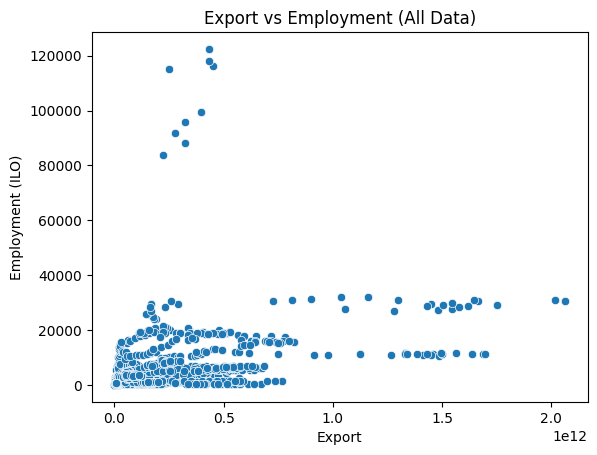

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

if isinstance(df.index, pd.MultiIndex) or not isinstance(df.index, pd.RangeIndex):
    df_plot = df.reset_index()
else:
    df_plot = df

sns.scatterplot(data=df_plot, x='Export', y='ILO')
plt.xlabel('Export')
plt.ylabel('Employment (ILO)')
plt.title('Export vs Employment (All Data)')
plt.show()

### 4.2. The United States

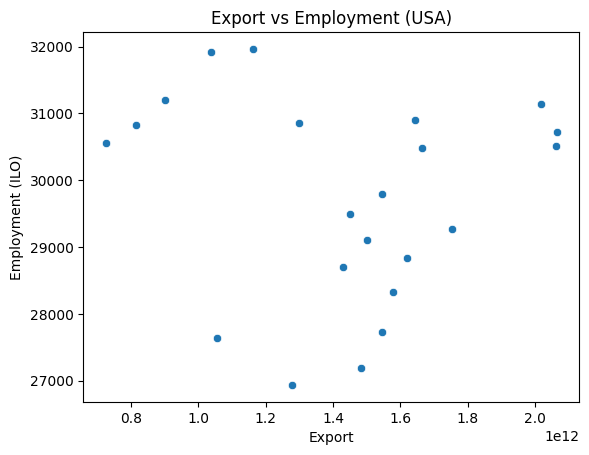

In [128]:
# USA
usa_df = df_plot[df_plot['country'] == 'USA']
sns.scatterplot(data=usa_df, x='Export', y='ILO')
plt.xlabel('Export')
plt.ylabel('Employment (ILO)')
plt.title('Export vs Employment (USA)')
plt.show()

### 4.3. India

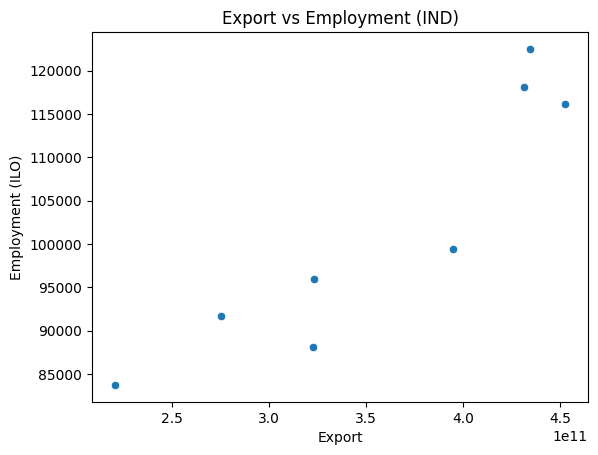

In [129]:
# India
ind_df = df_plot[df_plot['country'] == 'IND']
sns.scatterplot(data=ind_df, x='Export', y='ILO')
plt.xlabel('Export')
plt.ylabel('Employment (ILO)')
plt.title('Export vs Employment (IND)')
plt.show()

### 4.4. The United States vs. India 

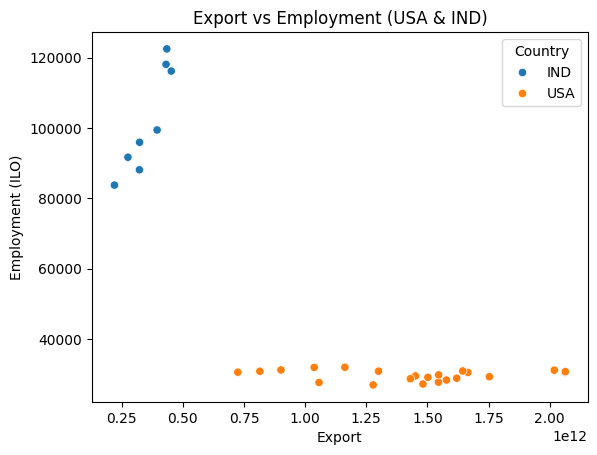

In [130]:
# USA and India 
df_us_in = df_plot[df_plot['country'].isin(['USA', 'IND'])]

import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=df_us_in, x='Export', y='ILO', hue='country')
plt.xlabel('Export')
plt.ylabel('Employment (ILO)')
plt.title('Export vs Employment (USA & IND)')
plt.legend(title='Country')
plt.show()

## 5. Additional plots (time series analysis)

### 5.1. The United States

In [131]:
# Extract data for the United States (USA) 
usa_df = df.loc['USA']

# Display the first/last few rows of the USA data to examine the data 
print(usa_df.head())
print(usa_df.tail())
usa_df = df.loc['USA']

            Export        Import        ILO
year                                       
2003  7.247366e+11  1.302834e+12  30560.423
2004  8.148444e+11  1.525304e+12  30825.738
2005  9.010414e+11  1.734849e+12  31195.043
2006  1.037029e+12  1.918997e+12  31921.004
2007  1.162538e+12  2.017121e+12  31963.932
            Export        Import        ILO
year                                       
2020  1.430254e+12  2.405382e+12  28699.402
2021  1.753137e+12  2.932976e+12  29270.564
2022  2.062090e+12  3.372902e+12  30513.430
2023  2.018543e+12  3.168471e+12  31137.472
2024  2.063803e+12  3.356813e+12  30726.170


In [132]:
# Create a copy of the USA data to avoid modifying the original
usa_df = df.loc['USA'].copy()

# Reset the index so that 'year' becomes a column (for easier plotting)
usa_df = usa_df.reset_index()

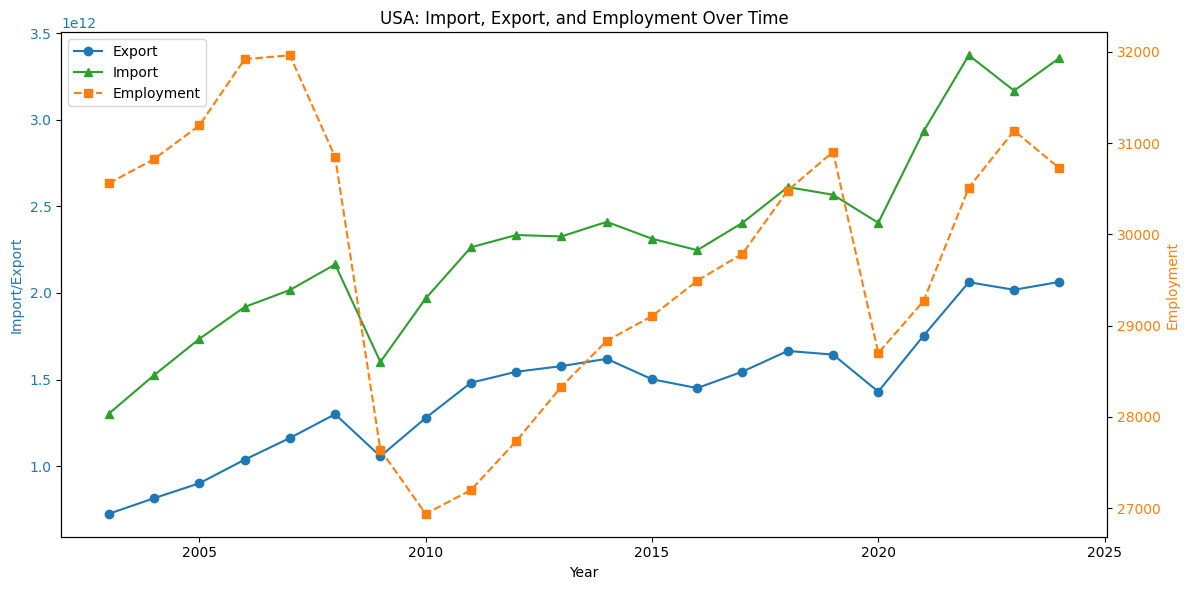

In [133]:
import matplotlib.pyplot as plt

# Create the figure and first axis (for Import & Export)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Export on left Y-axis
ax1.plot(usa_df['year'], usa_df['Export'], color='tab:blue', marker='o', label='Export')
# Plot Import on left Y-axis
ax1.plot(usa_df['year'], usa_df['Import'], color='tab:green', marker='^', label='Import')
ax1.set_xlabel('Year')
ax1.set_ylabel('Import/Export', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second axis for Employment
ax2 = ax1.twinx()
ax2.plot(usa_df['year'], usa_df['ILO'], 
         color='tab:orange', marker='s', 
         linestyle='--', label='Employment')
ax2.set_ylabel('Employment', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Title and layout
plt.title('USA: Import, Export, and Employment Over Time')
fig.tight_layout()
plt.show()

### 5.2. Japan

In [134]:
# Extract data for the Japan (JPN) 
jpn_df = df.loc['JPN']

# Display the first few rows of the JPN data to examine the data 
print(jpn_df.head())
print(jpn_df.tail())
jpn_df = df.loc['JPN']

            Export        Import        ILO
year                                       
2000  4.792755e+11  3.797084e+11  19925.225
2001  4.033441e+11  3.492919e+11  19362.772
2002  4.167294e+11  3.376131e+11  18581.652
2003  4.720069e+11  3.834653e+11  18558.721
2004  5.657611e+11  4.552539e+11  18039.636
            Export        Import        ILO
year                                       
2018  7.381951e+11  7.485253e+11  15742.423
2019  7.056711e+11  7.210774e+11  15762.287
2020  6.412826e+11  6.354023e+11  15503.838
2021  7.570663e+11  7.722762e+11  15346.013
2022  7.466721e+11  8.985999e+11  15409.052


In [135]:
# Create a copy of the JPN data to avoid modifying the original
jpn_df = df.loc['JPN'].copy()

# Reset the index so that 'year' becomes a column (for easier plotting)
jpn_df = jpn_df.reset_index()

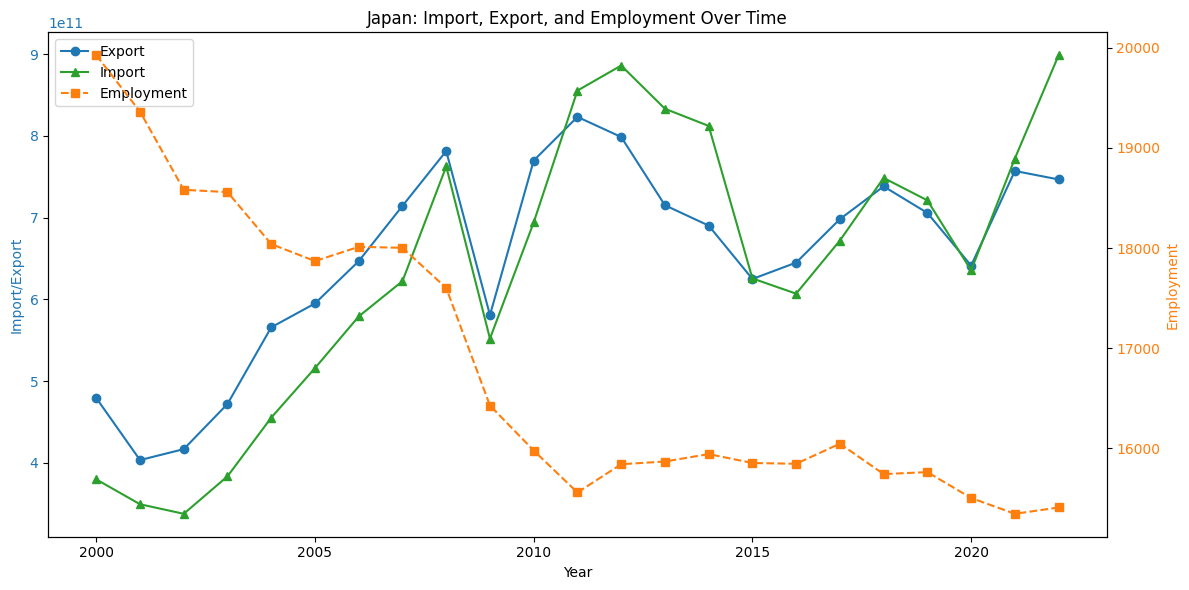

In [136]:
import matplotlib.pyplot as plt

# Create the figure and first axis (for Import & Export)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Export on left Y-axis
ax1.plot(jpn_df['year'], jpn_df['Export'], color='tab:blue', marker='o', label='Export')
# Plot Import on left Y-axis
ax1.plot(jpn_df['year'], jpn_df['Import'], color='tab:green', marker='^', label='Import')
ax1.set_xlabel('Year')
ax1.set_ylabel('Import/Export', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second axis for Employment
ax2 = ax1.twinx()
ax2.plot(jpn_df['year'], jpn_df['ILO'], 
         color='tab:orange', marker='s', 
         linestyle='--', label='Employment')
ax2.set_ylabel('Employment', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Title and layout
plt.title('Japan: Import, Export, and Employment Over Time')
fig.tight_layout()
plt.show()

### 5.3. Germany

In [137]:
# Extract data for the Germany (DEU) 
deu_df = df.loc['DEU']

# Display the first few rows of the USA data to examine the data 
print(deu_df.head())
print(deu_df.tail())
deu_df = df.loc['DEU']

            Export        Import        ILO
year                                       
2000  5.496067e+11  5.008300e+11  12179.631
2001  5.714267e+11  4.860221e+11  11973.955
2002  6.159974e+11  4.904501e+11  11740.755
2003  7.485313e+11  6.017610e+11  11272.780
2004  9.117421e+11  7.181500e+11  11083.029
            Export        Import        ILO
year                                       
2019  1.493267e+12  1.239895e+12  11509.243
2020  1.385852e+12  1.173167e+12  11267.732
2021  1.635600e+12  1.424675e+12  11321.097
2022  1.686142e+12  1.588853e+12  11318.740
2023  1.697350e+12  1.469329e+12  11367.120


In [138]:
# Create a copy of the JPN data to avoid modifying the original
deu_df = df.loc['DEU'].copy()

# Reset the index so that 'year' becomes a column (for easier plotting)
deu_df = deu_df.reset_index()

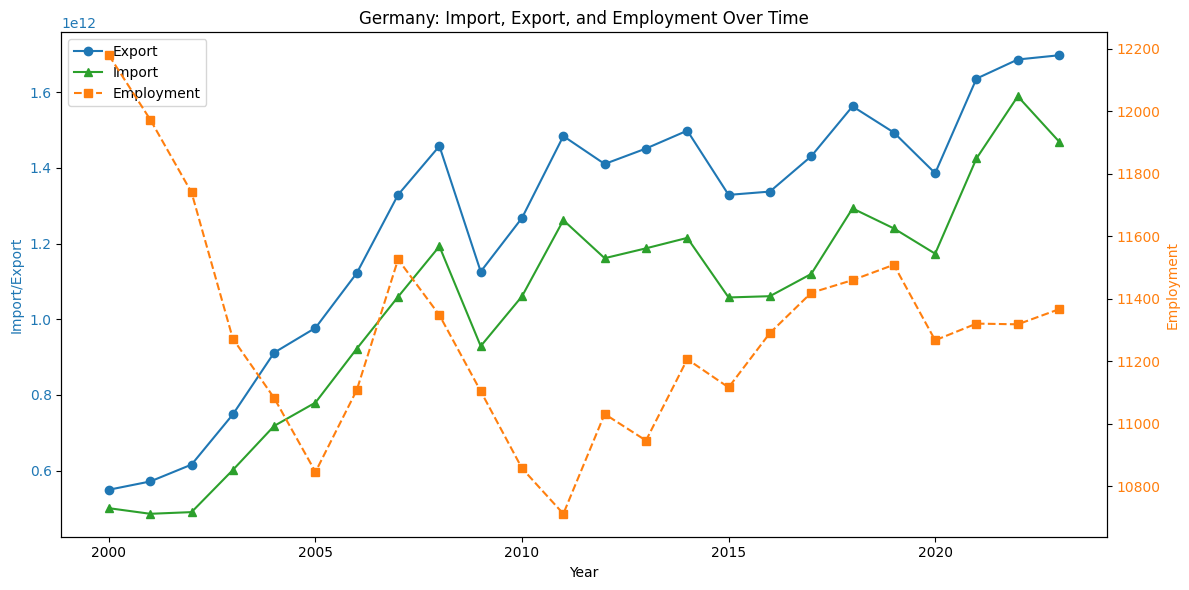

In [139]:
import matplotlib.pyplot as plt

# Create the figure and first axis (for Import & Export)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Export on left Y-axis
ax1.plot(deu_df['year'], deu_df['Export'], color='tab:blue', marker='o', label='Export')
# Plot Import on left Y-axis
ax1.plot(deu_df['year'], deu_df['Import'], color='tab:green', marker='^', label='Import')
ax1.set_xlabel('Year')
ax1.set_ylabel('Import/Export', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second axis for Employment
ax2 = ax1.twinx()
ax2.plot(deu_df['year'], deu_df['ILO'], 
         color='tab:orange', marker='s', 
         linestyle='--', label='Employment')
ax2.set_ylabel('Employment', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Title and layout
plt.title('Germany: Import, Export, and Employment Over Time')
fig.tight_layout()
plt.show()

### 5.4. India

In [140]:
# Extract data for the India (IND) 
ind_df = df.loc['IND']

# Display the first few rows of the USA data to examine the data 
print(ind_df.head())
print(ind_df.tail())
ind_df = df.loc['IND']

            Export        Import        ILO
year                                       
2010  2.204085e+11  3.500294e+11  83757.228
2018  3.224921e+11  5.076157e+11  88115.752
2019  3.232507e+11  4.788837e+11  95942.189
2020  2.754887e+11  3.679804e+11  91691.611
2021  3.948137e+11  5.704020e+11  99435.749
            Export        Import         ILO
year                                        
2020  2.754887e+11  3.679804e+11   91691.611
2021  3.948137e+11  5.704020e+11   99435.749
2022  4.526842e+11  7.325660e+11  116195.210
2023  4.314120e+11  6.721401e+11  118109.251
2024  4.344355e+11  6.977451e+11  122489.102


In [141]:
# Create a copy of the IND data to avoid modifying the original
ind_df = df.loc['IND'].copy()

# Reset the index so that 'year' becomes a column (for easier plotting)
ind_df = ind_df.reset_index()

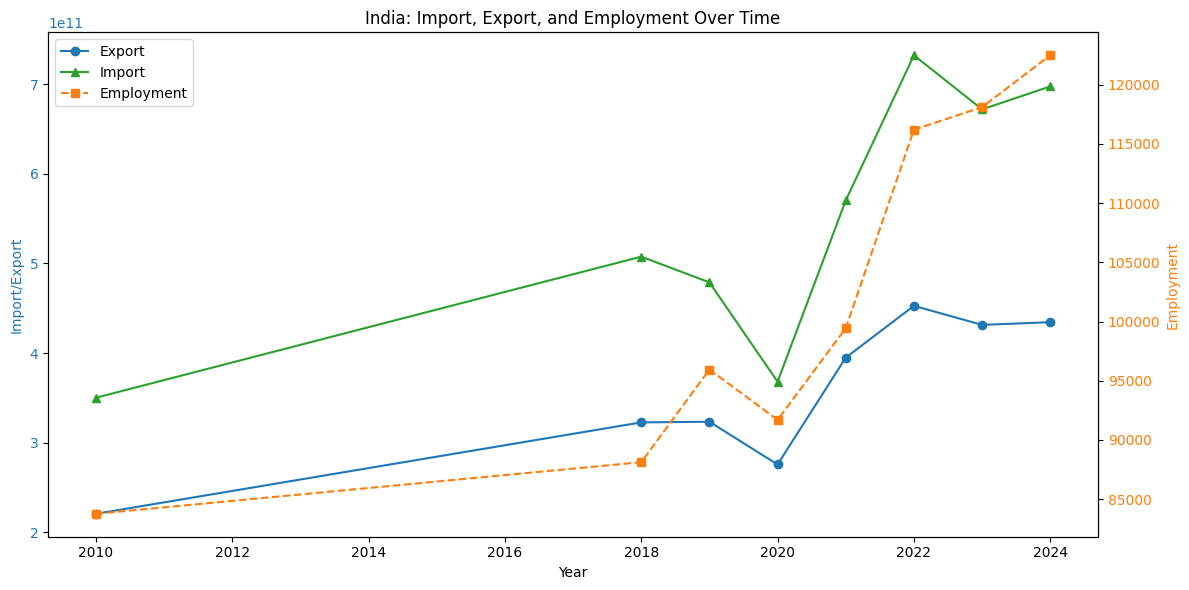

In [142]:
import matplotlib.pyplot as plt

# Create the figure and first axis (for Import & Export)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Export on left Y-axis
ax1.plot(ind_df['year'], ind_df['Export'], color='tab:blue', marker='o', label='Export')
# Plot Import on left Y-axis
ax1.plot(ind_df['year'], ind_df['Import'], color='tab:green', marker='^', label='Import')
ax1.set_xlabel('Year')
ax1.set_ylabel('Import/Export', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second axis for Employment
ax2 = ax1.twinx()
ax2.plot(ind_df['year'], ind_df['ILO'], 
         color='tab:orange', marker='s', 
         linestyle='--', label='Employment')
ax2.set_ylabel('Employment', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Title and layout
plt.title('India: Import, Export, and Employment Over Time')
fig.tight_layout()
plt.show()

### 5.5. Vietnam

In [143]:
# Extract data for Vietnam (VNM) 
vnm_df = df.loc['VNM']

# Display the first few rows of the USA data to examine the data 
print(vnm_df.head())
vnm_df = df.loc['VNM']

print(vnm_df.tail())

            Export        Import        ILO
year                                       
2007  4.856134e+10  6.276469e+10   9380.126
2009  5.709627e+10  6.994881e+10  10487.935
2010  7.223666e+10  8.483855e+10  10668.639
2011  9.690567e+10  1.067499e+11  10824.656
2012  1.145292e+11  1.137804e+11  10892.274
            Export        Import        ILO
year                                       
2019  2.646103e+11  2.534420e+11  16148.095
2020  2.814415e+11  2.613095e+11  16568.234
2021  3.357926e+11  3.307523e+11  16243.284
2022  3.709092e+11  3.587883e+11  16880.979
2023  3.530775e+11  3.254437e+11  17140.218


In [144]:
# Create a copy of the JPN data to avoid modifying the original
vnm_df = df.loc['VNM'].copy()

# Reset the index so that 'year' becomes a column (for easier plotting)
vnm_df = vnm_df.reset_index()

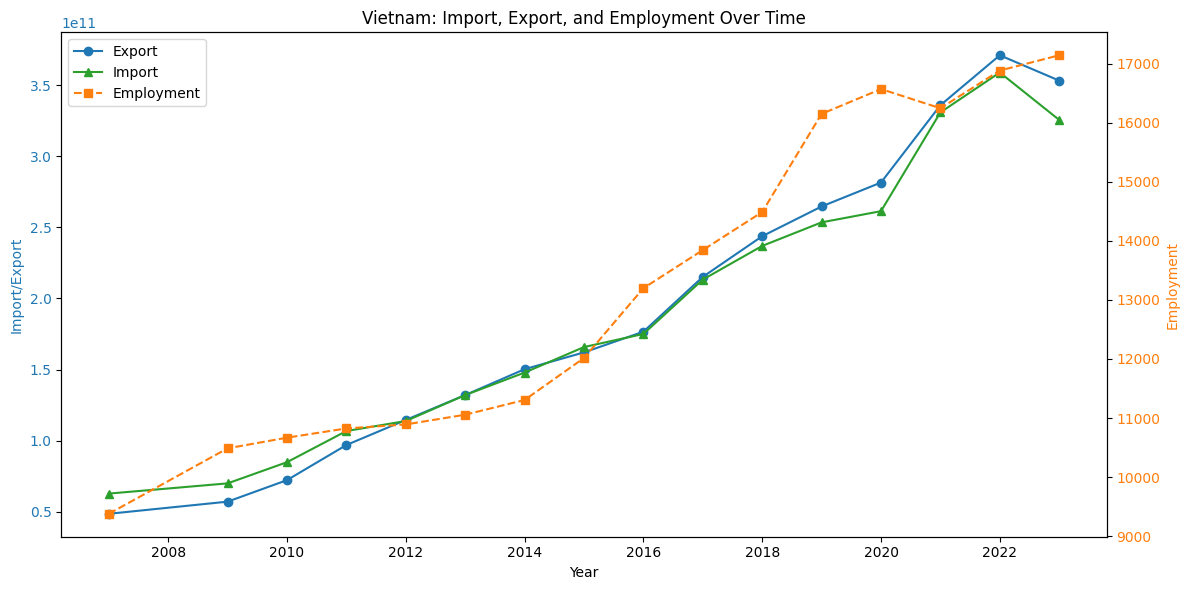

In [151]:
import matplotlib.pyplot as plt

# Create the figure and first axis (for Import & Export)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Export on left Y-axis
ax1.plot(vnm_df['year'], vnm_df['Export'], color='tab:blue', marker='o', label='Export')
# Plot Import on left Y-axis
ax1.plot(vnm_df['year'], vnm_df['Import'], color='tab:green', marker='^', label='Import')
ax1.set_xlabel('Year')
ax1.set_ylabel('Import/Export', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second axis for Employment
ax2 = ax1.twinx()
ax2.plot(vnm_df['year'], vnm_df['ILO'], 
         color='tab:orange', marker='s', 
         linestyle='--', label='Employment')
ax2.set_ylabel('Employment', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Title and layout
plt.title('Vietnam: Import, Export, and Employment Over Time')
fig.tight_layout()
plt.show()

## 6. Regression Analysis

### 6.1. Level regression analysis

### 6.2. Growth regression analysis 

## 7. Case Study: Developed vs. Developing Countries

In [156]:
countries = df['country'].unique()
print(sorted(countries))
print(f"Number of countries: {len(countries)}")

['ABW', 'AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CYM', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GRC', 'GRD', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KEN', 'KGZ', 'KHM', 'KIR', 'KOR', 'LAO', 'LBN', 'LBR', 'LCA', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MDA', 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MSR', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PLW', 'POL', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SDN', 'SEN', 'SGP', 'SLB', 'SLE', 'SLV', 'SRB', 'STP', 'SUR', 'SVK', 'SVN', 'SWE', 'SWZ', 'SYC'

In [ ]:
# !pip install pycountry
import pycountry

# Create the mapping from ISO country code (alpha-3) to country name
code_to_name = {
    code: pycountry.countries.get(alpha_3=code).name if pycountry.countries.get(alpha_3=code) else "Unknown"
    for code in df['country'].unique() 
}

# Reset index if 'country' and 'year' are in index
df = df.reset_index()

# Map country codes to country names
df['country_name'] = df['country'].map(code_to_name)

# Move 'country_name' column to be right after 'country'
cols = df.columns.tolist()
country_idx = cols.index('country')
cols.insert(country_idx + 1, cols.pop(cols.index('country_name')))
df = df[cols]

# Preview the result
print(df.head())

   index country country_name  year        Export        Import       ILO
0      0     ABW        Aruba  2010  1.245232e+08  1.071034e+09     6.738
1      1     AFG  Afghanistan  2014  5.705340e+08  7.697178e+09  1389.950
2      2     AFG  Afghanistan  2017  8.319268e+08  7.792600e+09  1122.933
3      3     AGO       Angola  2004  1.325368e+10  5.072076e+09   406.676
4      4     AGO       Angola  2009  4.063941e+10  2.391885e+10   432.430


In [159]:
# Define commonly accepted developed countries by ISO alpha-3 codes (based on OECD, World Bank etc.)
developed_countries = {
    'USA', 'CAN', 'GBR', 'FRA', 'DEU', 'JPN', 'ITA', 'AUS', 'KOR', 'ESP', 'NLD', 'CHE', 'SWE', 'NOR', 'DNK',
    'FIN', 'ISL', 'AUT', 'BEL', 'IRL', 'NZL', 'SGP', 'LUX', 'PRT', 'GRC', 'SVN', 'SVK', 'CZE', 'EST', 'LVA', 'LTU',
    'ISR', 'HKG'
}

# Assign each country to 'Developed' or 'Developing'
df['country_class'] = df['country'].apply(lambda x: 'Developed' if x in developed_countries else 'Developing')

# Move 'country_class' column next to 'country_name'
cols = df.columns.tolist()
cols.insert(country_idx + 2, cols.pop(cols.index('country_class')))
df = df[cols]

# Preview the result
df.head()

,index,country,country_name,country_class,year,Export,Import,ILO
0,0,ABW,Aruba,Developing,2010,1.245232e+08,1.071034e+09,6.738
1,1,AFG,Afghanistan,Developing,2014,5.705340e+08,7.697178e+09,1389.950
2,2,AFG,Afghanistan,Developing,2017,8.319268e+08,7.792600e+09,1122.933
3,3,AGO,Angola,Developing,2004,1.325368e+10,5.072076e+09,406.676
4,4,AGO,Angola,Developing,2009,4.063941e+10,2.391885e+10,432.430


In [ ]:
# Regression for Developed Nations: Export ~ ILO
import statsmodels.formula.api as smf

# Filter for developed nations and drop NA values in relevant columns
df_dev = df[df['country_class'] == 'Developed'].dropna(subset=['Export', 'ILO'])

# Run the regression
model_dev = smf.ols('Export ~ ILO', data=df_dev).fit()

# Display summary
print("Regression Results for Developed Nations (Export ~ ILO):")
print(model_dev.summary())



Regression Results for Developed Nations (Export ~ ILO):
                            OLS Regression Results                            
Dep. Variable:                 Export   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1366.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          6.58e-168
Time:                        12:40:10   Log-Likelihood:                -19672.
No. Observations:                 716   AIC:                         3.935e+04
Df Residuals:                     714   BIC:                         3.936e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [161]:
# Regression for Developing Nations: Export ~ ILO
# Filter for developing nations and drop NA values in relevant columns
df_deving = df[df['country_class'] == 'Developing'].dropna(subset=['Export', 'ILO'])

# Run the regression
model_deving = smf.ols('Export ~ ILO', data=df_deving).fit()

# Display summary
print("\nRegression Results for Developing Nations (Export ~ ILO):")
print(model_deving.summary())



Regression Results for Developing Nations (Export ~ ILO):
                            OLS Regression Results                            
Dep. Variable:                 Export   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     544.0
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           1.84e-99
Time:                        12:40:22   Log-Likelihood:                -31756.
No. Observations:                1197   AIC:                         6.352e+04
Df Residuals:                    1195   BIC:                         6.353e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

Regression Results for Developed Nations (Export ~ ILO):
                            OLS Regression Results                            
Dep. Variable:                 Export   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1366.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          6.58e-168
Time:                        12:51:19   Log-Likelihood:                -19672.
No. Observations:                 716   AIC:                         3.935e+04
Df Residuals:                     714   BIC:                         3.936e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

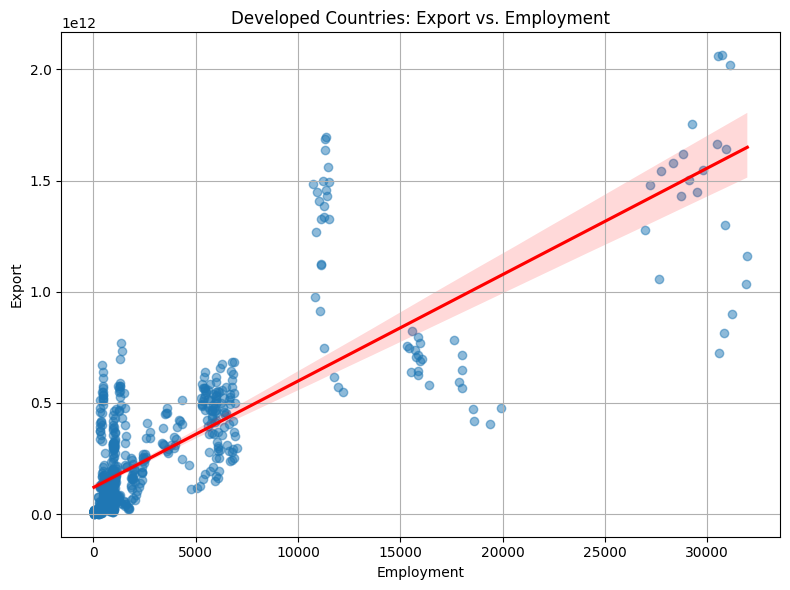

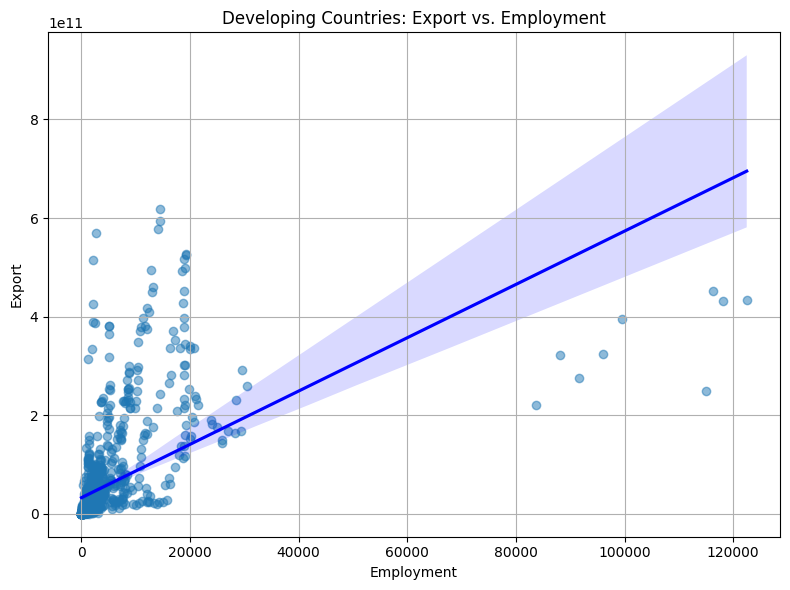

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Filter for developed nations and drop NA values
df_dev = df[df['country_class'] == 'Developed'].dropna(subset=['Export', 'ILO'])

# Filter for developing nations and drop NA values
df_deving = df[df['country_class'] == 'Developing'].dropna(subset=['Export', 'ILO'])

# Run regression for developed nations
model_dev = smf.ols('Export ~ ILO', data=df_dev).fit()
print("Regression Results for Developed Nations (Export ~ ILO):")
print(model_dev.summary())

# Run regression for developing nations
model_deving = smf.ols('Export ~ ILO', data=df_deving).fit()
print("\nRegression Results for Developing Nations (Export ~ ILO):")
print(model_deving.summary())

# Plot for Developed Nations
plt.figure(figsize=(8, 6))
sns.regplot(data=df_dev, x='ILO', y='Export', scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.title('Developed Countries: Export vs. Employment')
plt.xlabel('Employment')
plt.ylabel('Export')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for Developing Nations
plt.figure(figsize=(8, 6))
sns.regplot(data=df_deving, x='ILO', y='Export', scatter_kws={'alpha': 0.5}, line_kws={"color": "blue"})
plt.title('Developing Countries: Export vs. Employment')
plt.xlabel('Employment')
plt.ylabel('Export')
plt.grid(True)
plt.tight_layout()
plt.show()